Student Performance Indicator

Life cycle of Machine learning Project
- Understanding the Problem Statement
- Data Collection
- Data Checks to perform
- Exploratory data analysis
- Data Pre-Processing
- Model Training
- Choose best model

1) Problem statement

This project understands how the student's performance (test scores) is affected by other variables such as Gender, Ethnicity, Parental level of education, Lunch and Test preparation course.

2) Data Collection

- Dataset Source - https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977
- The data consists of 8 column and 1000 rows.

Import Pandas, Numpy, Matplotlib, Seaborn and Warning library

In [25]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

Import CSV data as Pandas Dataframe

In [26]:
df = pd.read_csv('raw.csv')

In [77]:
df.head(10)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333
5,female,group B,associate's degree,standard,none,71,83,78,232,77.333333
6,female,group B,some college,standard,completed,88,95,92,275,91.666667
7,male,group B,some college,free/reduced,none,40,43,39,122,40.666667
8,male,group D,high school,free/reduced,completed,64,64,67,195,65.000000
9,female,group B,high school,free/reduced,none,38,60,50,148,49.333333


In [28]:
df.shape

(1001, 8)

Dataset information
- gender : sex of students -> (Male/female)
- race/ethnicity : ethnicity of students -> (Group A, B,C, D,E)
- parental level of education : parents' final education ->(bachelor's degree, some college,master's degree,associate's degree,high school)
- lunch : having lunch before test (standard or free/reduced)
- test preparation course : complete or not complete before test
- math score
- reading score
- writing score

3. Data Checks to perform
- Check Missing values
- Check Duplicates
- Check data type
- Check the number of unique values of each column
- Check statistics of data set
- Check various categories present in the different categorical column

In [29]:
df.isnull().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [30]:
df.duplicated().sum()

1

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001 entries, 0 to 1000
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1001 non-null   object
 1   race_ethnicity               1001 non-null   object
 2   parental_level_of_education  1001 non-null   object
 3   lunch                        1001 non-null   object
 4   test_preparation_course      1001 non-null   object
 5   math_score                   1001 non-null   int64 
 6   reading_score                1001 non-null   int64 
 7   writing_score                1001 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.7+ KB


In [32]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [33]:
df.describe()

,math_score,reading_score,writing_score
count,1001.00000,1001.000000,1001.000000
mean,66.09990,69.185814,68.071928
std,15.15942,14.602583,15.198645
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,58.000000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


Unique values in the Categorical Columns

In [34]:
print(df['gender'].unique())

['female' 'male']


In [35]:
print(df['race_ethnicity'].unique())

['group B' 'group C' 'group A' 'group D' 'group E']


In [36]:
print(df['parental_level_of_education'].unique())

["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']


In [37]:
print(df['lunch'].unique())

['standard' 'free/reduced']


In [38]:
print(df['test_preparation_course'].unique())

['none' 'completed']


In [39]:
numerical_features = [features for features in df.columns if df[features].dtype != 'O']
categorical_features = [features for features in df.columns if df[features].dtype == 'O']

In [40]:
numerical_features

['math_score', 'reading_score', 'writing_score']

In [41]:
categorical_features

['gender',
 'race_ethnicity',
 'parental_level_of_education',
 'lunch',
 'test_preparation_course']

In [42]:
df['total score']=df['math_score']+df['reading_score'] + df['writing_score']
df['average']=df['total score']/3

In [43]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [53]:
reading_full = df[df['reading_score'] == 100]['average'].count()
writing_full = df[df['writing_score'] == 100]['average'].count()
math_full = df[df['math_score'] == 100]['average'].count()

In [54]:
print(f'No. of students with full reading score: {reading_full}')
print(f'No. of students with full writing score: {writing_full}')
print(f'No. of students with full math score: {math_full}')

No. of students with full reading score: 17
No. of students with full writing score: 14
No. of students with full math score: 7


In [55]:

reading_less_20 = df[df['reading_score'] <= 20]['average'].count()
writing_less_20 = df[df['writing_score'] <= 20]['average'].count()
math_less_20 = df[df['math_score'] <= 20]['average'].count()

In [56]:
print(f'Number of students with less than 20 marks in Maths: {math_less_20}')
print(f'Number of students with less than 20 marks in Writing: {writing_less_20}')
print(f'Number of students with less than 20 marks in Reading: {reading_less_20}')

Number of students with less than 20 marks in Maths: 4
Number of students with less than 20 marks in Writing: 3
Number of students with less than 20 marks in Reading: 1


Insights
- From above values we get students have performed the worst in Maths
- Best performance is in reading section

4. Exploring Data ( Visualization )

4.1 Visualize average score distribution to make some conclusion.
- Histogram
- Kernel Distribution Function (KDE)

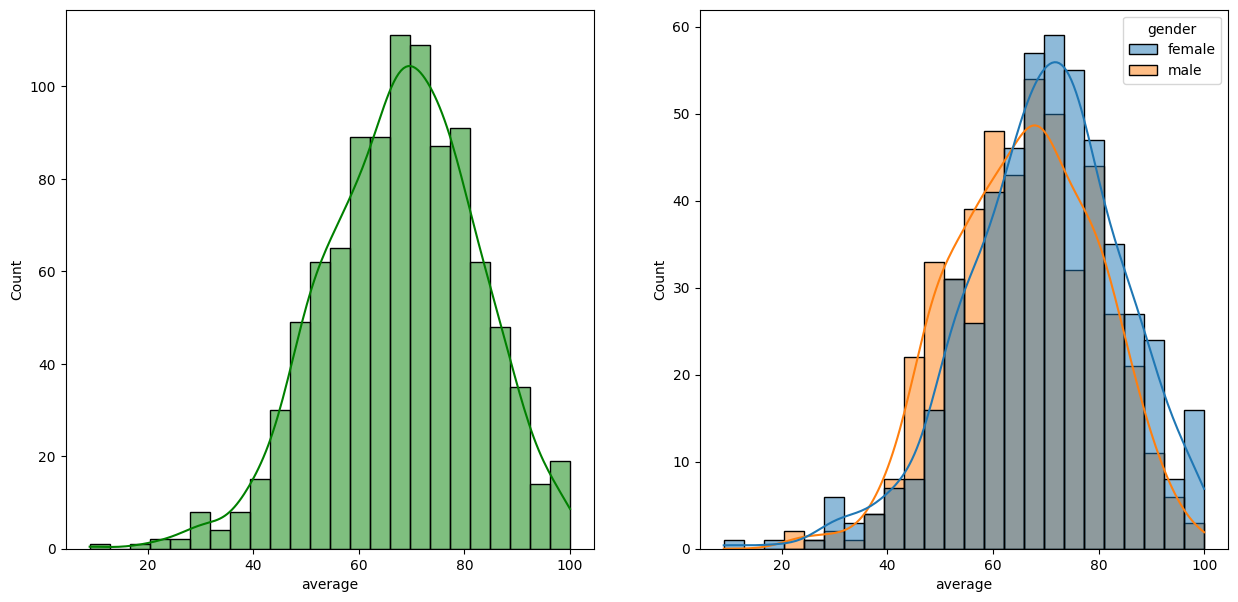

In [61]:
fig, axs = plt.subplots(1, 2, figsize=(15,7))
plt.subplot(1,2,1)
# row, column, index of current plot
sns.histplot(data=df, x="average", kde=True,color='g')
plt.subplot(1,2,2)
sns.histplot(data=df,x='average',kde=True,hue='gender')
plt.show()

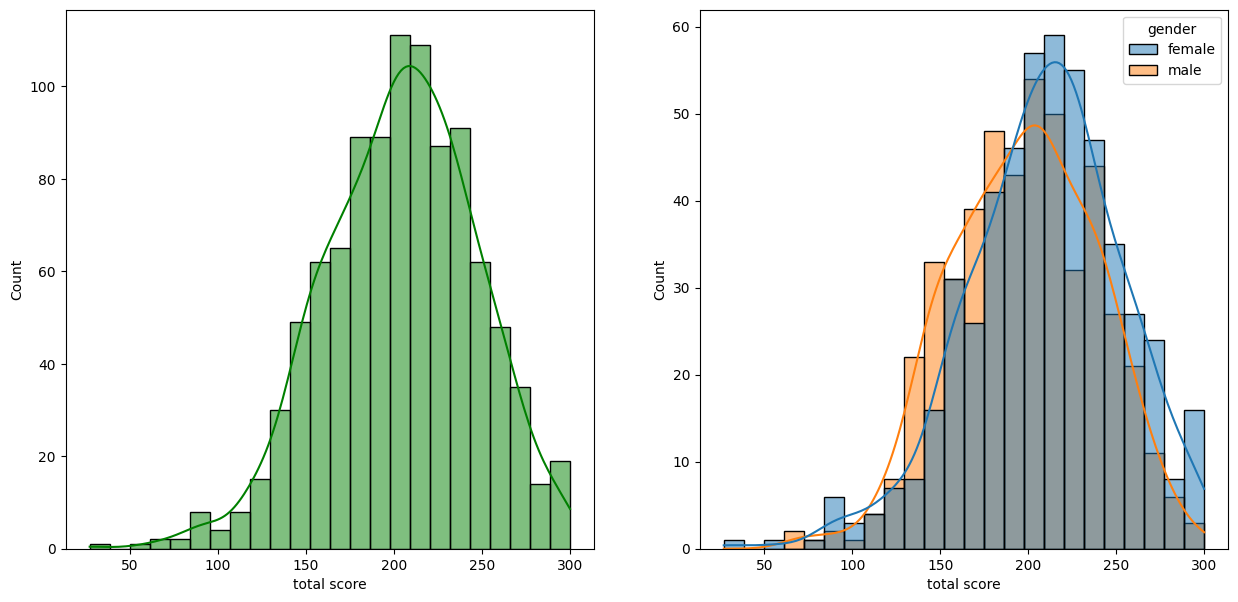

In [62]:
fig, axs = plt.subplots(1, 2, figsize=(15,7))
plt.subplot(1,2,1)
# row, column, index of current plot
sns.histplot(data=df, x='total score', kde=True,color='g')
plt.subplot(1,2,2)
sns.histplot(data=df,x='total score',kde=True,hue='gender')
plt.show()

Insight:
- Female have more better average and total score in comparison to male

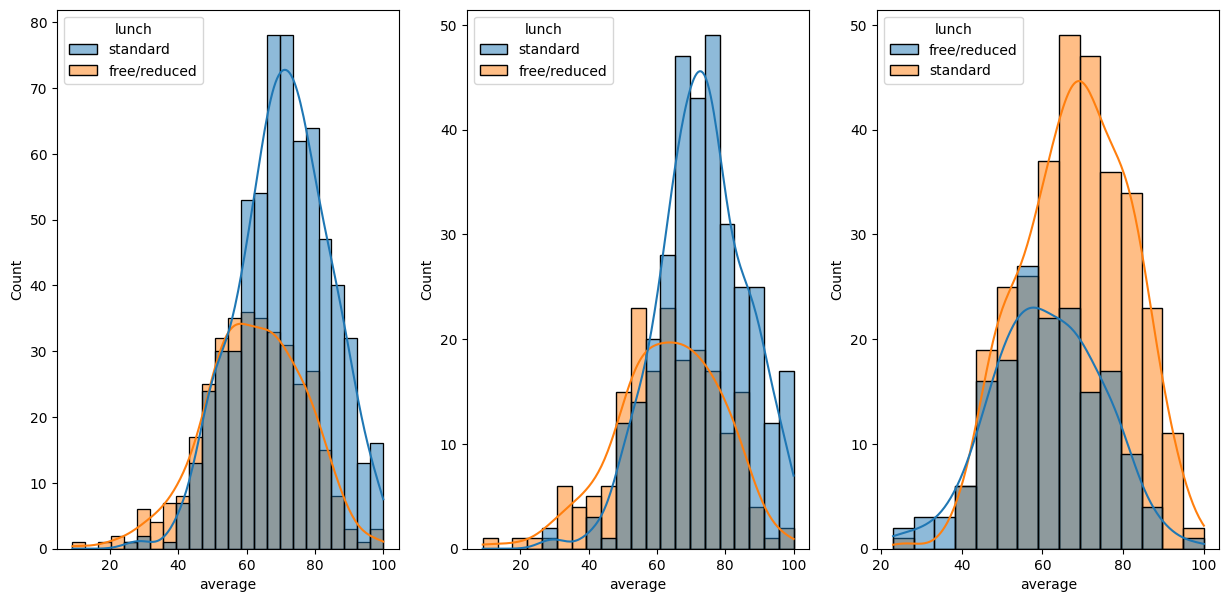

In [64]:
fig, axs = plt.subplots(1, 3, figsize=(15,7))
plt.subplot(1,3,1)
# row, column, index of current plot
sns.histplot(data=df, x='average', kde=True,color='g', hue='lunch')
plt.subplot(1,3,2)
sns.histplot(data=df[df['gender'] == 'female'],x='average',kde=True,hue='lunch')
plt.subplot(1,3,3)
sns.histplot(data=df[df['gender'] == 'male'],x='average',kde=True,hue='lunch')
plt.show()

Insight
- Standard lunch perform well in exam in case of both male and female

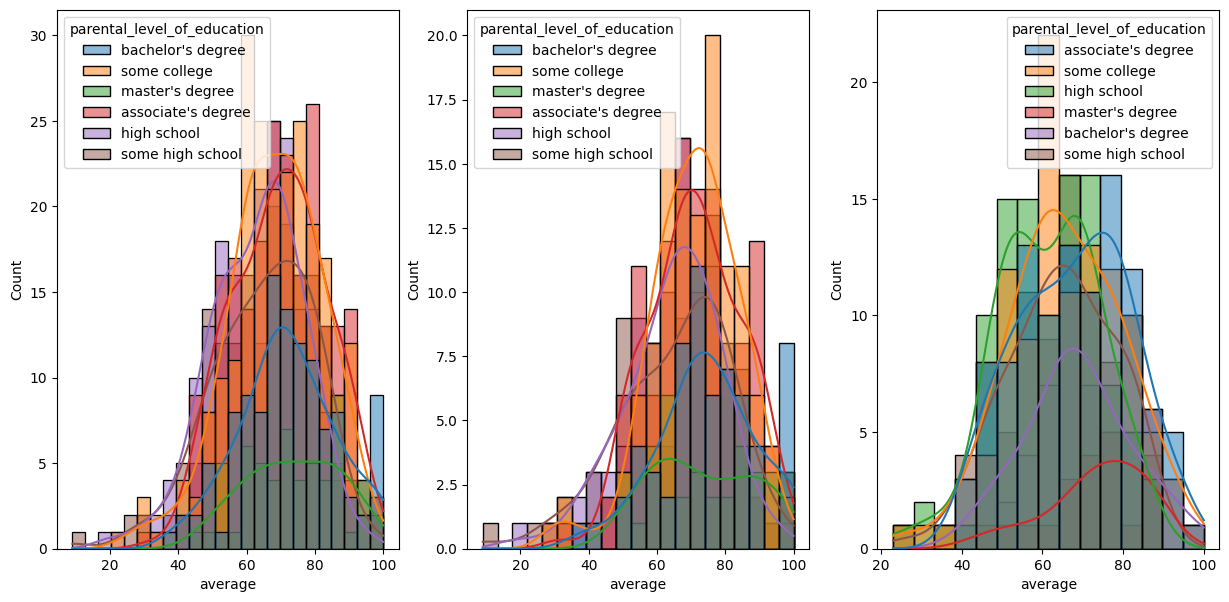

In [66]:
fig, axs = plt.subplots(1, 3, figsize=(15,7))
plt.subplot(1,3,1)
# row, column, index of current plot
sns.histplot(data=df, x='average', kde=True,color='g', hue='parental_level_of_education')
plt.subplot(1,3,2)
sns.histplot(data=df[df['gender'] == 'female'],x='average',kde=True,hue='parental_level_of_education')
plt.subplot(1,3,3)
sns.histplot(data=df[df['gender'] == 'male'],x='average',kde=True,hue='parental_level_of_education')
plt.show()

Insights
- In general parent's education don't help student perform well in exam.

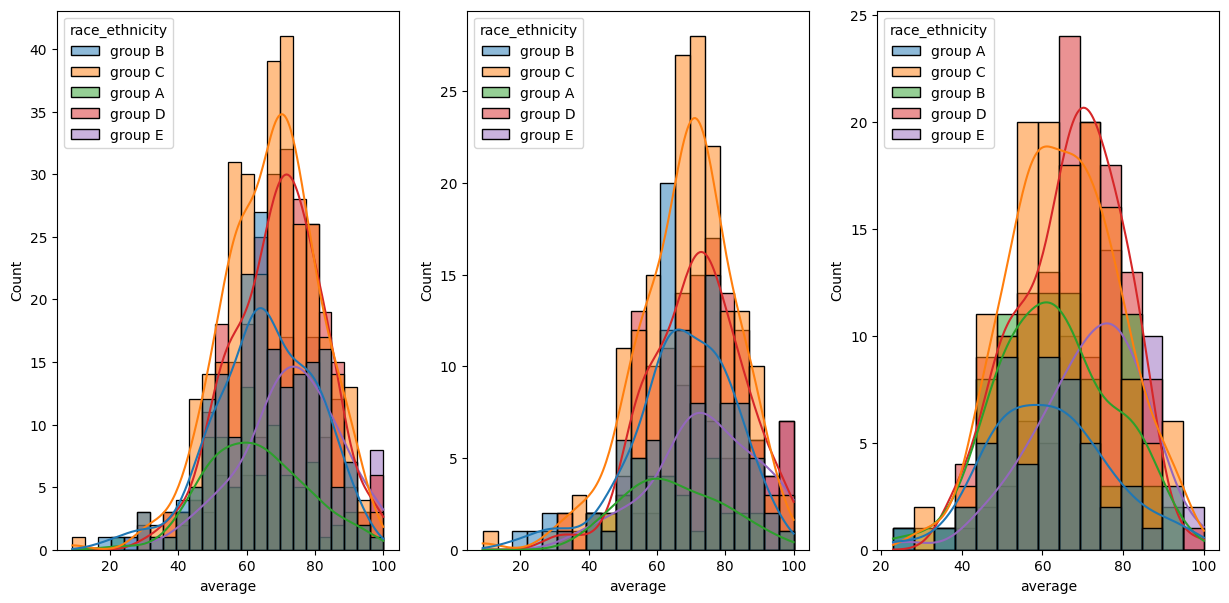

In [68]:
fig, axs = plt.subplots(1, 3, figsize=(15,7))
plt.subplot(1,3,1)
# row, column, index of current plot
sns.histplot(data=df, x='average', kde=True,color='g', hue='race_ethnicity')
plt.subplot(1,3,2)
sns.histplot(data=df[df['gender'] == 'female'],x='average',kde=True,hue='race_ethnicity')
plt.subplot(1,3,3)
sns.histplot(data=df[df['gender'] == 'male'],x='average',kde=True,hue='race_ethnicity')
plt.show()

Insights
- Students of group A tends to perform poorly in exam irrespective of whether they are male or female

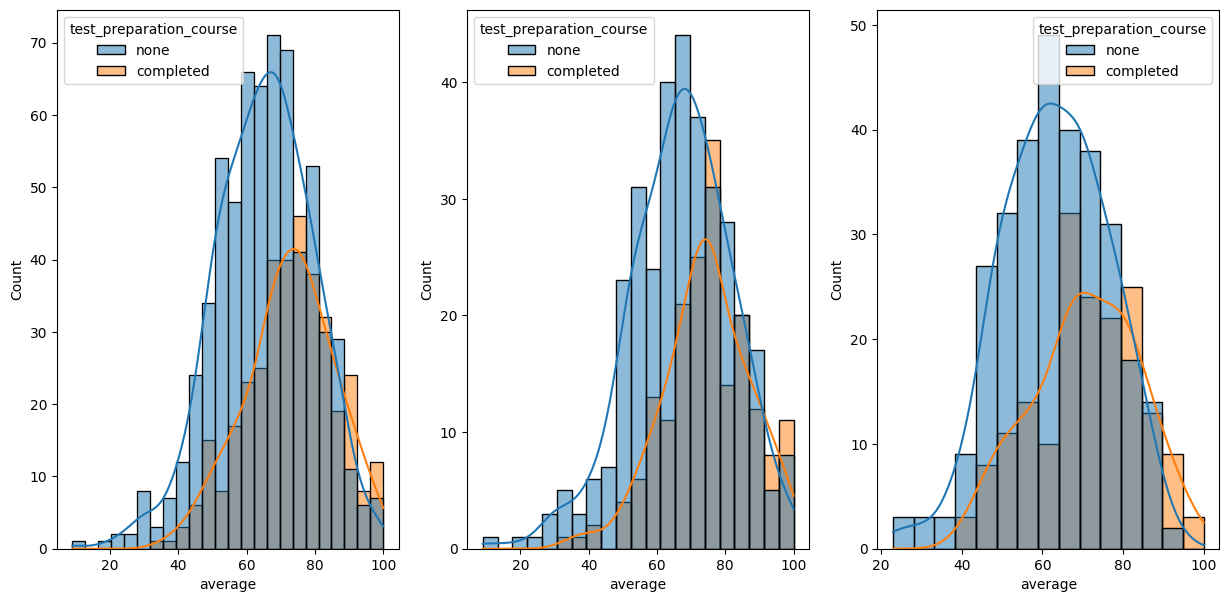

In [93]:
fig, axs = plt.subplots(1, 3, figsize=(15,7))
plt.subplot(1,3,1)
# row, column, index of current plot
sns.histplot(data=df, x='average', kde=True,color='g', hue='test_preparation_course')
plt.subplot(1,3,2)
sns.histplot(data=df[df['gender'] == 'female'],x='average',kde=True,hue='test_preparation_course')
plt.subplot(1,3,3)
sns.histplot(data=df[df['gender'] == 'male'],x='average',kde=True,hue='test_preparation_course')
plt.show()

(-1.25, 1.25, -1.25, 1.25)

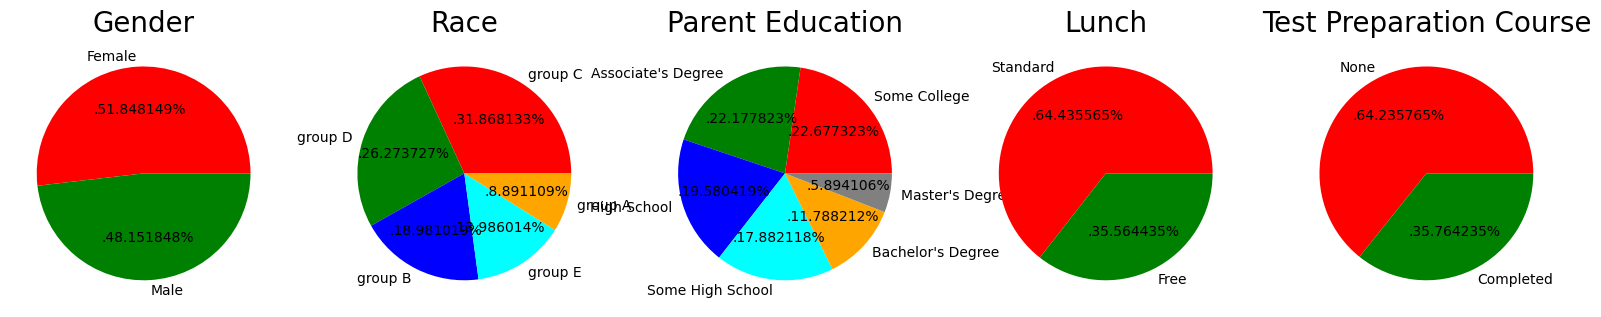

In [81]:
fig, axs = plt.subplots(1, 5, figsize=(20,10))

plt.subplot(1,5,1)
# row, column, index of current plot
size = df['gender'].value_counts()
labels = 'Female', 'Male'
color = ['red','green']
plt.pie(size, colors = color, labels = labels,autopct = '.%2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')

plt.subplot(1,5,2)
size = df['race_ethnicity'].value_counts()
labels = 'group C', 'group D', 'group B', 'group E', 'group A'
color = ['red', 'green', 'blue', 'cyan','orange']
plt.pie(size, colors = color, labels = labels,autopct = '.%2f%%')
plt.title('Race', fontsize = 20)
plt.axis('off')

plt.subplot(1,5,3)
size = df['parental_level_of_education'].value_counts()
labels = 'Some College', "Associate's Degree",'High School','Some High School',"Bachelor's Degree","Master's Degree"
color = ['red', 'green', 'blue', 'cyan','orange', 'grey']
plt.pie(size, colors = color, labels = labels,autopct = '.%2f%%')
plt.title('Parent Education', fontsize = 20)
plt.axis('off')

plt.subplot(1,5,4)
size = df['lunch'].value_counts()
labels = 'Standard', 'Free'
color = ['red', 'green']
plt.pie(size, colors = color, labels = labels,autopct = '.%2f%%')
plt.title('Lunch', fontsize = 20)
plt.axis('off')

plt.subplot(1,5,5)
size = df['test_preparation_course'].value_counts()
labels = 'None', 'Completed'
color = ['red', 'green']
plt.pie(size, colors = color, labels = labels,autopct = '.%2f%%')
plt.title('Test Preparation Course', fontsize = 20)
plt.axis('off')

Insights
- Number of Male and Female students is almost equal
- Number students are greatest in Group C
- Number of students who have standard lunch are greater
- Number of students who have not enrolled in any test preparation course is greater
- Number of students whose parental education is "Some College" is greater followed closely by "Associate's Degree"

Feature Wise Visualization

1. Gender

Univariate Analysis
- female students are 52% and male students are 48%

Bivariate Analysis
- Does gender has any impact on Student Performance?

2. RACE/EHNICITY 

Univariate Analysis
- Most of the students belong to Group C/D and lowest to Group A

Bivariate Analysis - Does race has any impact on Student Performance?
- Group E students have scored the highest marks.
- Group A students have scored the lowest marks.

3. PARENTAL LEVEL OF EDUCATION 

Univariate Analysis
- Largest number of parents are from some college.

Bivariate Analysis - Does Parent Education has any impact on Student Performance?

- The score of student whose parents possess master and bachelor level education are higher than others.



4. Lunch

Univariate Analysis
- Students being served Standard lunch was more than free lunch

Bivariate Analysis - Does Lunch has any impact on Student Performance?

- Students who get Standard Lunch tend to perform better than students who got free/reduced lunch


5. Test Preparation Course

Univariate Analysis
- Students who have not taken the course are more in numbers

Bivariate Analysis - Does Test Preparation has any impact on Student Performance?

- Students who have completed the Test Prepration Course have scores higher in all three categories than those who haven't taken the course

Check Outliers

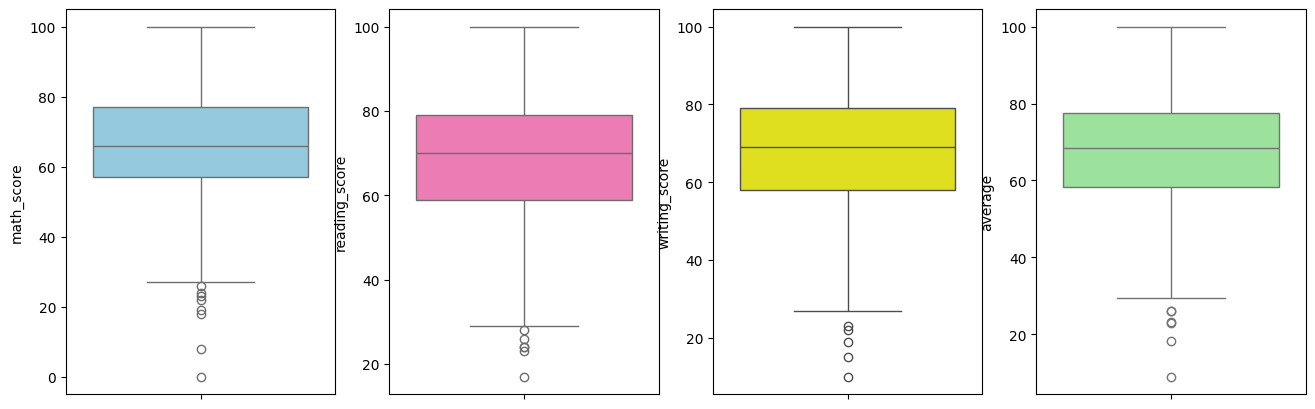

In [95]:
plt.subplots(1,4,figsize=(16,5))
plt.subplot(1,4,1)
sns.boxplot(df['math_score'],color='skyblue')
plt.subplot(1,4,2)
sns.boxplot(df['reading_score'],color='hotpink')
plt.subplot(1,4,3)
sns.boxplot(df['writing_score'],color='yellow')
plt.subplot(1,4,4)
sns.boxplot(df['average'],color='lightgreen')
plt.show()

In [105]:
#Outliers percentage for features
def outliers(df:pd.DataFrame, columns: list):
    outliers_df = pd.DataFrame(columns=['Feature', 'Upper_Outliers', 'Lower_Outliers', 'Percentage_Outliers'])
    for col in columns:
        q3=round(df[col].quantile(0.75),6)
        q1=round(df[col].quantile(0.25),6)
        iqr=q3-q1
        lw = q1 - (1.5*iqr)
        hw = q3 + (1.5*iqr)  
        uo=df[df[col]>hw].shape[0]
        lo=df[df[col]<lw].shape[0]
        outliers_list = {'Feature':col, 'Upper_Outliers': uo, 'Lower_Outliers':lo, 'Percentage_Outliers':((uo+lo)/df.shape[0])*100}
        # outliers_df = outliers_df.append(outliers_list, ignore_index=True)
        outliers_df = pd.concat([outliers_df, pd.DataFrame([outliers_list])], ignore_index=True)
    outliers_df = outliers_df.sort_values(by=['Percentage_Outliers'], ascending=False)
    return outliers_df

In [106]:
outliers(df, numerical_features)

,Feature,Upper_Outliers,Lower_Outliers,Percentage_Outliers
0,math_score,0,8,0.799201
1,reading_score,0,6,0.599401
2,writing_score,0,5,0.499500


MUTIVARIATE ANALYSIS USING PAIRPLOT

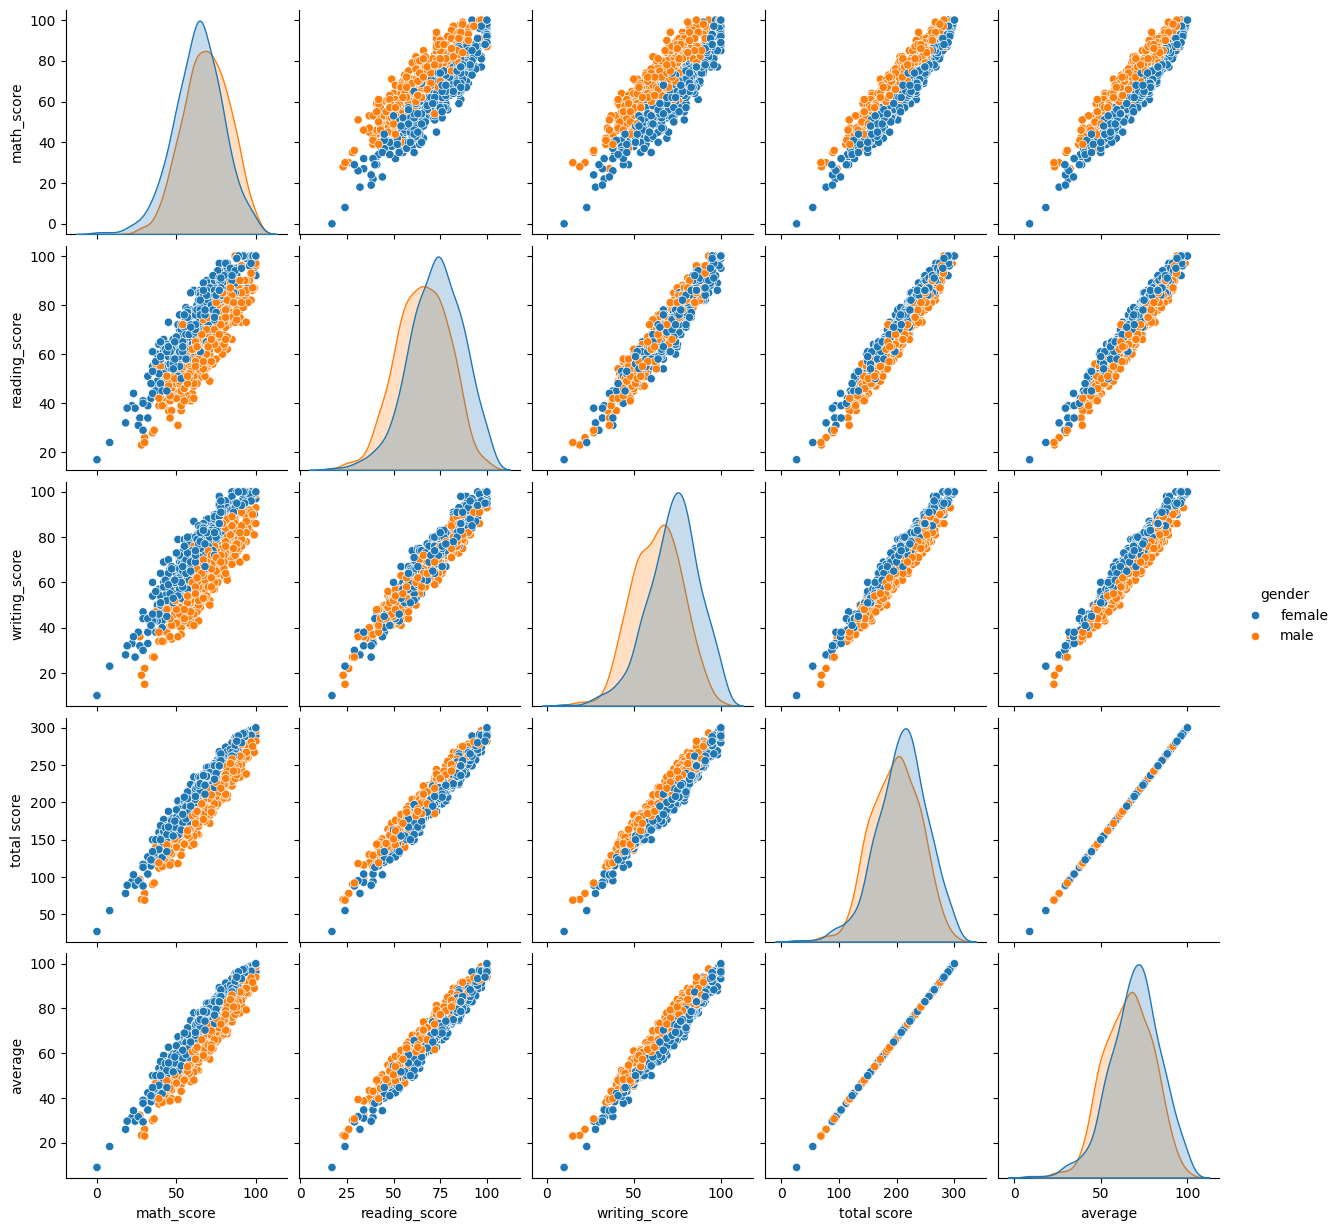

In [96]:
sns.pairplot(df,hue = 'gender')
plt.show()

Insights
- From the above plot it is clear that all the scores increase linearly with each other.

5. Conclusions

- Student's Performance is related with lunch, race, parental level education
- Females lead in pass percentage and also are top-scorers
- Student's Performance is not much related with test preparation course
- Finishing preparation course is benefitial.